In [1018]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [1019]:
#Step 1 : load the dataset
refinal=pd.read_csv(r"/content/drive/MyDrive/Heart_disease_cleveland_new.csv")

In [1020]:
# Display first five rows
print(refinal.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  


In [1021]:
#Display the number of columns and rows in refinal dataset
refinal.shape

(303, 14)

In [1022]:
#Display summary information
refinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [1023]:
#Display datatype of each column in the dataframe
print(refinal.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [1024]:
#Display statistical summary of numerical features in the dataframe
refinal.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [1025]:
#Generate statistic summary for the column contain float64 datatype
refinal.describe(include=['float64'])

,oldpeak
count,303.000000
mean,1.039604
std,1.161075
min,0.000000
25%,0.000000
50%,0.800000
75%,1.600000
max,6.200000


In [1026]:
## Check and display the number of missing values in each column
print(refinal.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [1027]:
#Define the numerical continous data
num_continous_features=['age','trestbps','chol','thalach','oldpeak']

#Identify the attributes that need to be converted into object data type
convert_features=[feature for feature in refinal.columns if feature not in num_continous_features]

#Convert the identified attributes to object data type
refinal[convert_features]=refinal[convert_features].astype('object')

#Display the updated datatype
refinal.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,object
restecg,object
thalach,int64
exang,object
oldpeak,float64


In [1028]:
#Display transposed summary statistics for numerical features
refinal.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [1029]:
#Generate summary statistics for categorical (object-type) features
refinal.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,4,3,2
top,1,3,0,0,0,0,0,1,0
freq,206,144,258,151,204,142,180,168,164


EXPLORATORY DATA ANALYSIS (EDA)

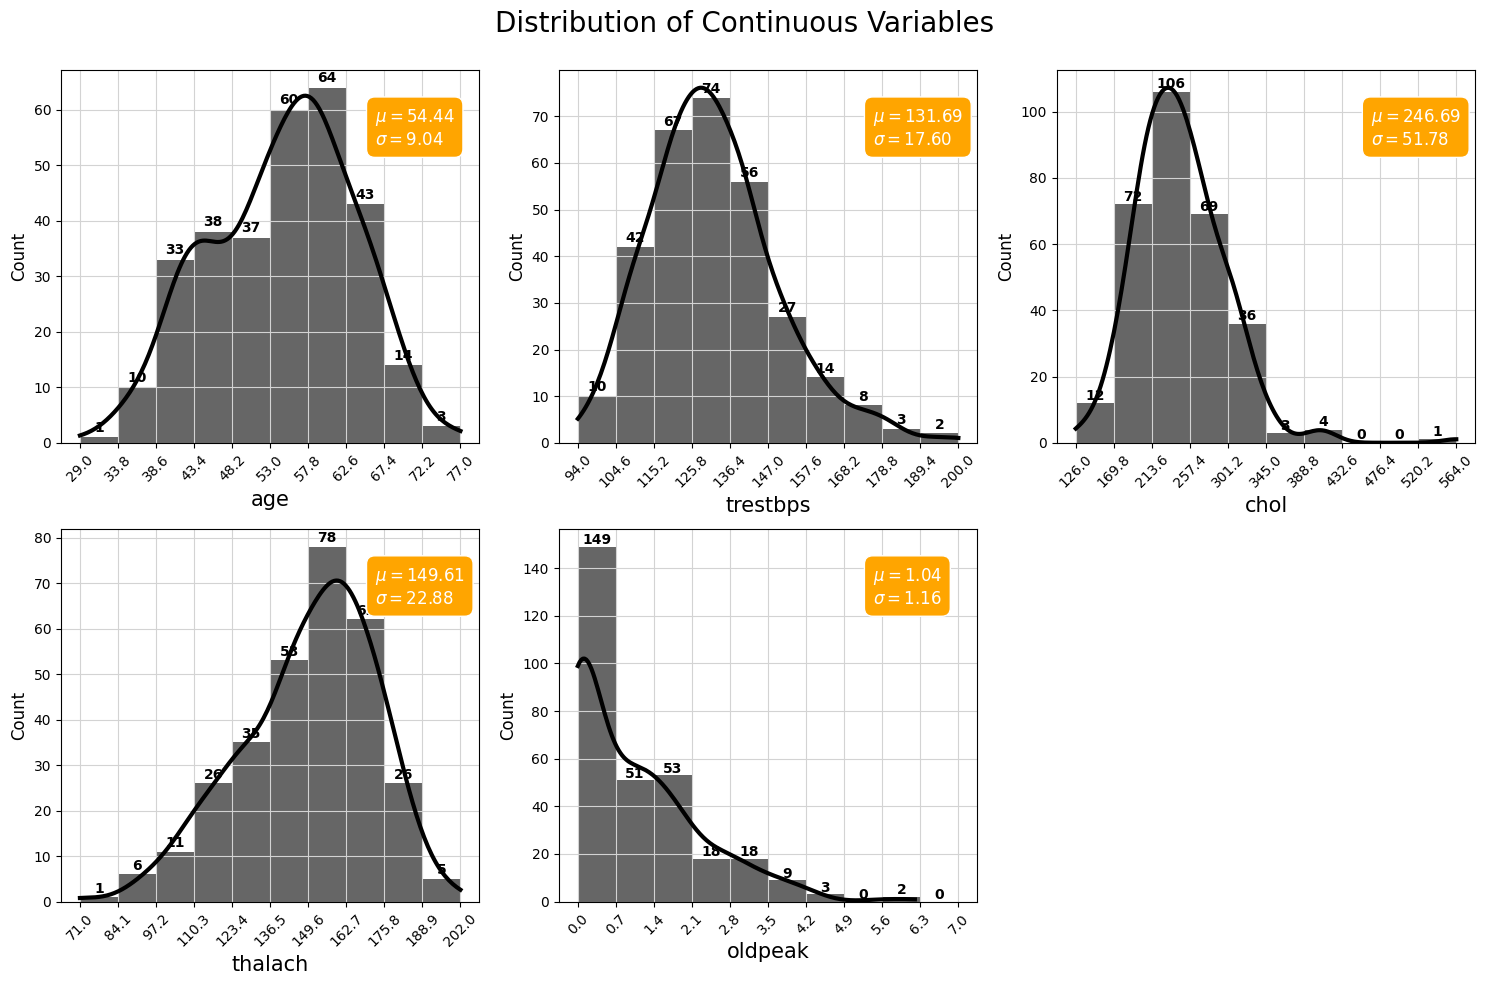

In [1030]:
refinal_continuous = refinal[num_continous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(refinal_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(refinal_continuous[col],
                                     range=(np.floor(refinal_continuous[col].min()), np.ceil(refinal_continuous[col].max())))

    graph = sns.histplot(data=refinal_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='black', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    #mean and std
    textstr = '\n'.join((
        r'$\mu=%.2f$' % refinal_continuous[col].mean(),
        r'$\sigma=%.2f$' % refinal_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='orange', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

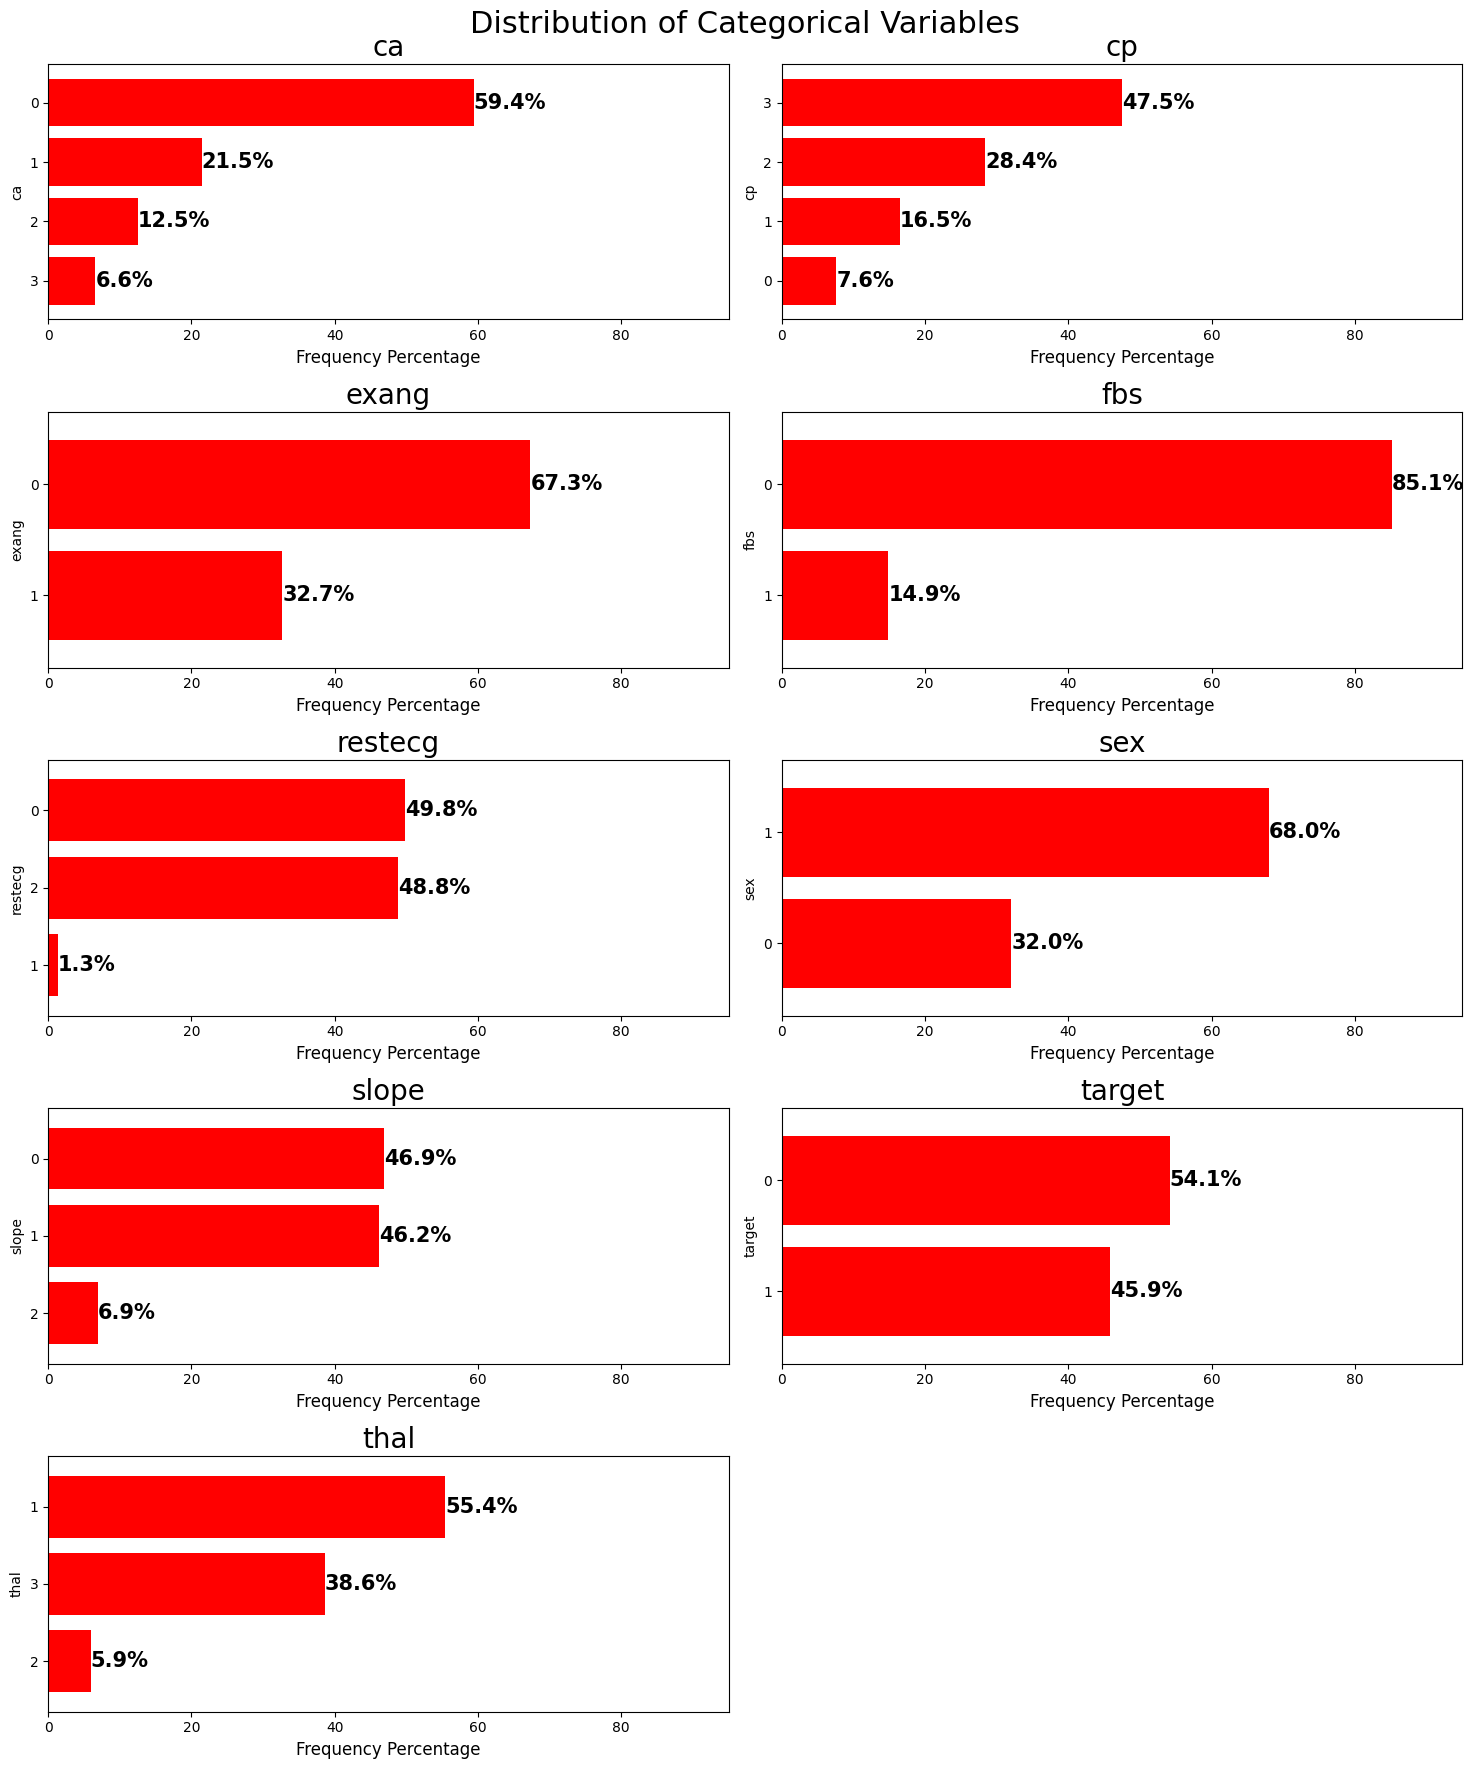

In [1031]:
categorical_features = refinal.columns.difference(num_continous_features)
refinal_categorical = refinal[categorical_features]
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2

    # Calculate frequency percentages
    value_counts = refinal[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')

    # Adding frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

Bivariate Analysis

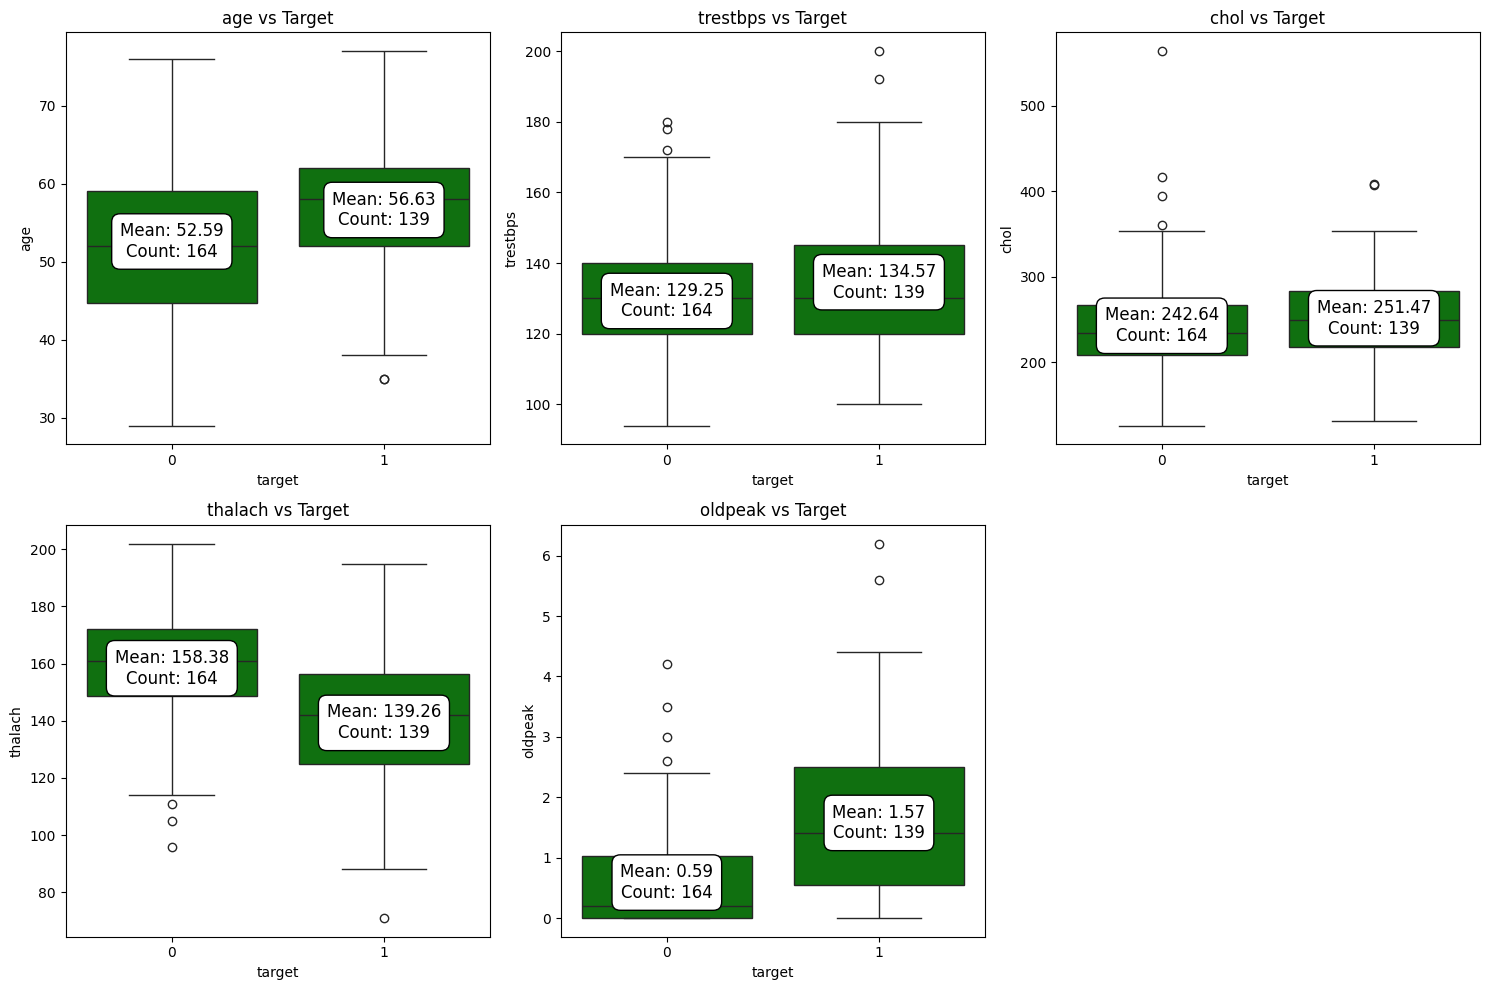

In [1032]:
#Set figure size
plt.figure(figsize=(15, 10))

for i, feature in enumerate(num_continous_features):
    plt.subplot(2, 3, i + 1)

    # Create the boxplot
    ax = sns.boxplot(x='target', y=feature, data=refinal,color="green")
    plt.title(f'{feature} vs Target')

    # Calculate mean and count for each 'target' group
    target_groups = refinal.groupby('target')[feature]
    for target_value, group in target_groups:
        mean_val = group.mean()
        count_val = group.count()

        # Add annotations for mean and count on the boxplot
        ax.annotate(f'Mean: {mean_val:.2f}\nCount: {count_val}',
                    xy=(target_value, mean_val),
                    xycoords='data',
                    ha='center',
                    va='center',
                    fontsize=12,
                    color='black',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
#Display the output
plt.show()


In [1033]:
#Copy of the orginal datset
cleaned_refinal = refinal.copy()

#Calculate Q1,Q3 and IQR for the numerical continuous features
Q1 = cleaned_refinal[num_continous_features].quantile(0.25)
Q3 = cleaned_refinal[num_continous_features].quantile(0.75)
#Interquartile range
IQR = Q3 - Q1

#Identify outliners
finoutl=(cleaned_refinal[num_continous_features] < (Q1 - 1.5 * IQR))| (cleaned_refinal[num_continous_features] > (Q3 + 1.5 * IQR))
#Filter rows that have NO outliers in any of the specified features
remout=~(finoutl).any(axis=1)
#Count outliners in each continous_features
outliers_count_specified = (finoutl).sum()
#new dataftrame without otliners
cleaned_refinal1 = cleaned_refinal[remout]

# output
print("\noutliners count :\n",outliers_count_specified)
print("Original shape:", refinal.shape)
print("After outlier removal:", cleaned_refinal1.shape)



outliners count :
 age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64
Original shape: (303, 14)
After outlier removal: (284, 14)


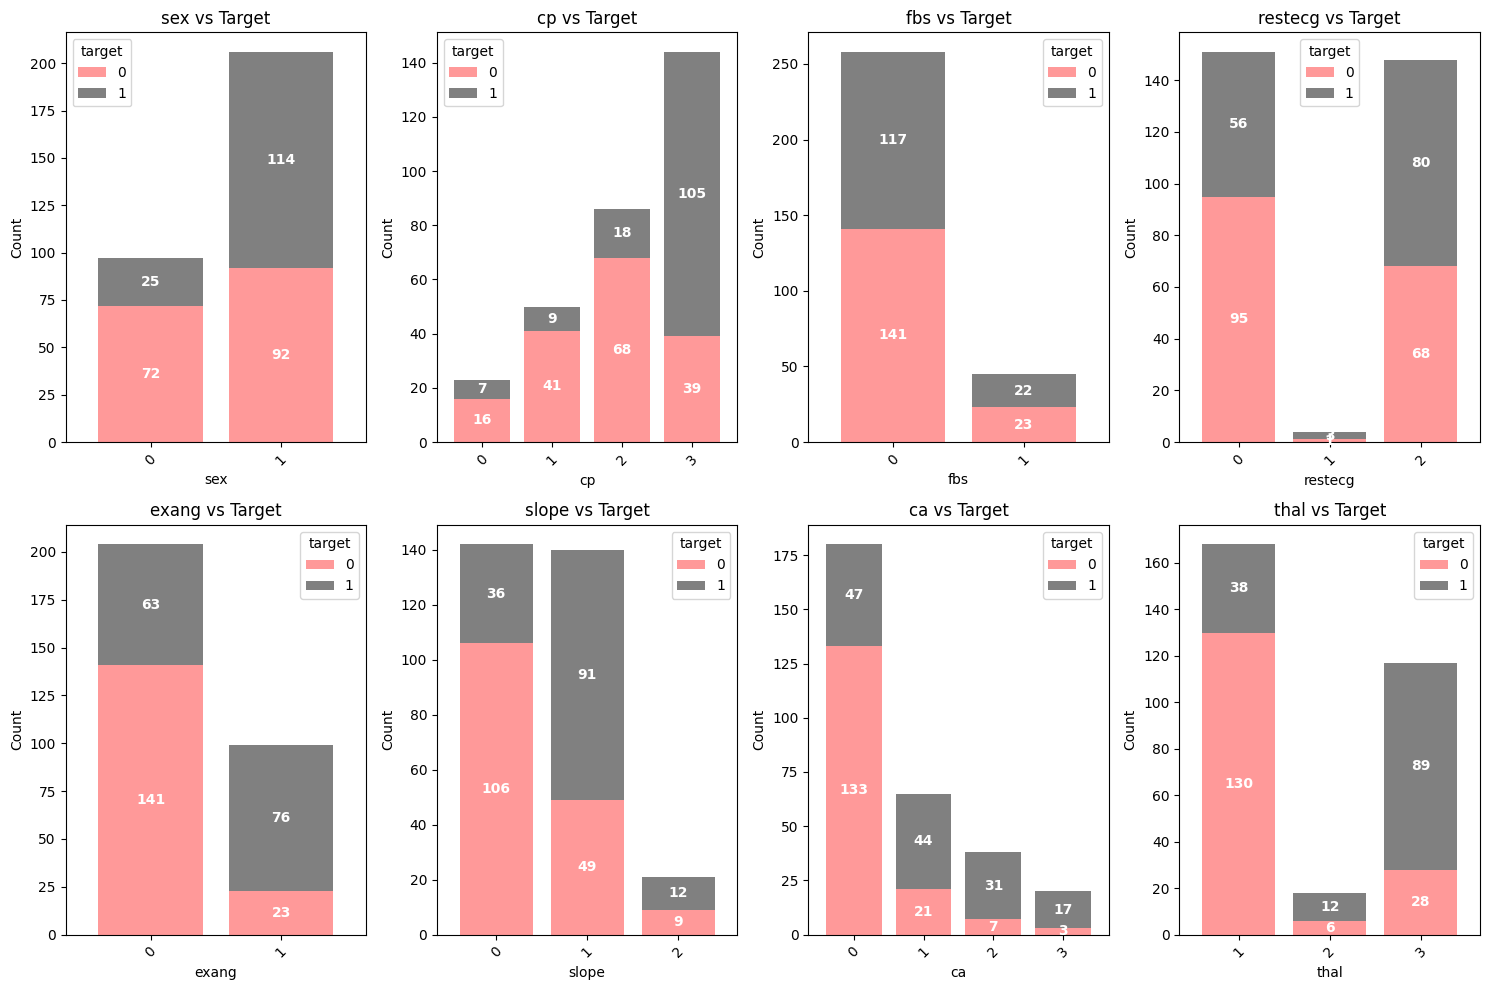

In [1034]:
# List of categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Set up the figure size
plt.figure(figsize=(15, 10))

# Loop through each categorical feature
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 4, i + 1)

    # Create a contingency table for counts
    crosstab = pd.crosstab(refinal[feature], refinal['target'])

    # Create stacked bar plot using pd.crosstab
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#ff9999','grey'], width=0.8)

    # Set plot title and labels
    plt.title(f'{feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Rotate x-axis labels for readability,rotating 45
    plt.xticks(rotation=45)

    # Add counts to the bars
    for p in plt.gca().patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2

        # Annotate the count on the bar
        plt.text(x, y, f'{int(height)}', ha='center', va='center', fontsize=10, fontweight='bold', color='white')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

/tmp/ipython-input-1035-1410057178.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cx=sns.countplot(data=refinal, x='target', palette=colors)


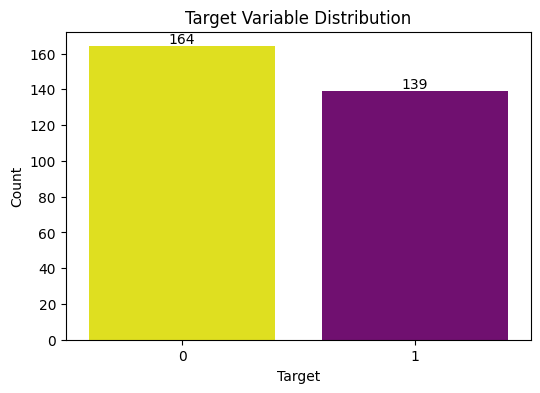

In [1035]:
#set figure size
plt.figure(figsize=(6, 4))
colors=["yellow","purple"]
#plotting bar chart
cx=sns.countplot(data=refinal, x='target', palette=colors)
# For displaying the count on each bar
for bar in cx.patches:
    cx.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            int(bar.get_height()),
            ha='center',
            va='bottom')

plt.title("Target Variable Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

Axes(0.125,0.77;0.775x0.11)
Axes(0.125,0.605;0.775x0.11)
Axes(0.125,0.44;0.775x0.11)
Axes(0.125,0.275;0.775x0.11)
Axes(0.125,0.11;0.775x0.11)


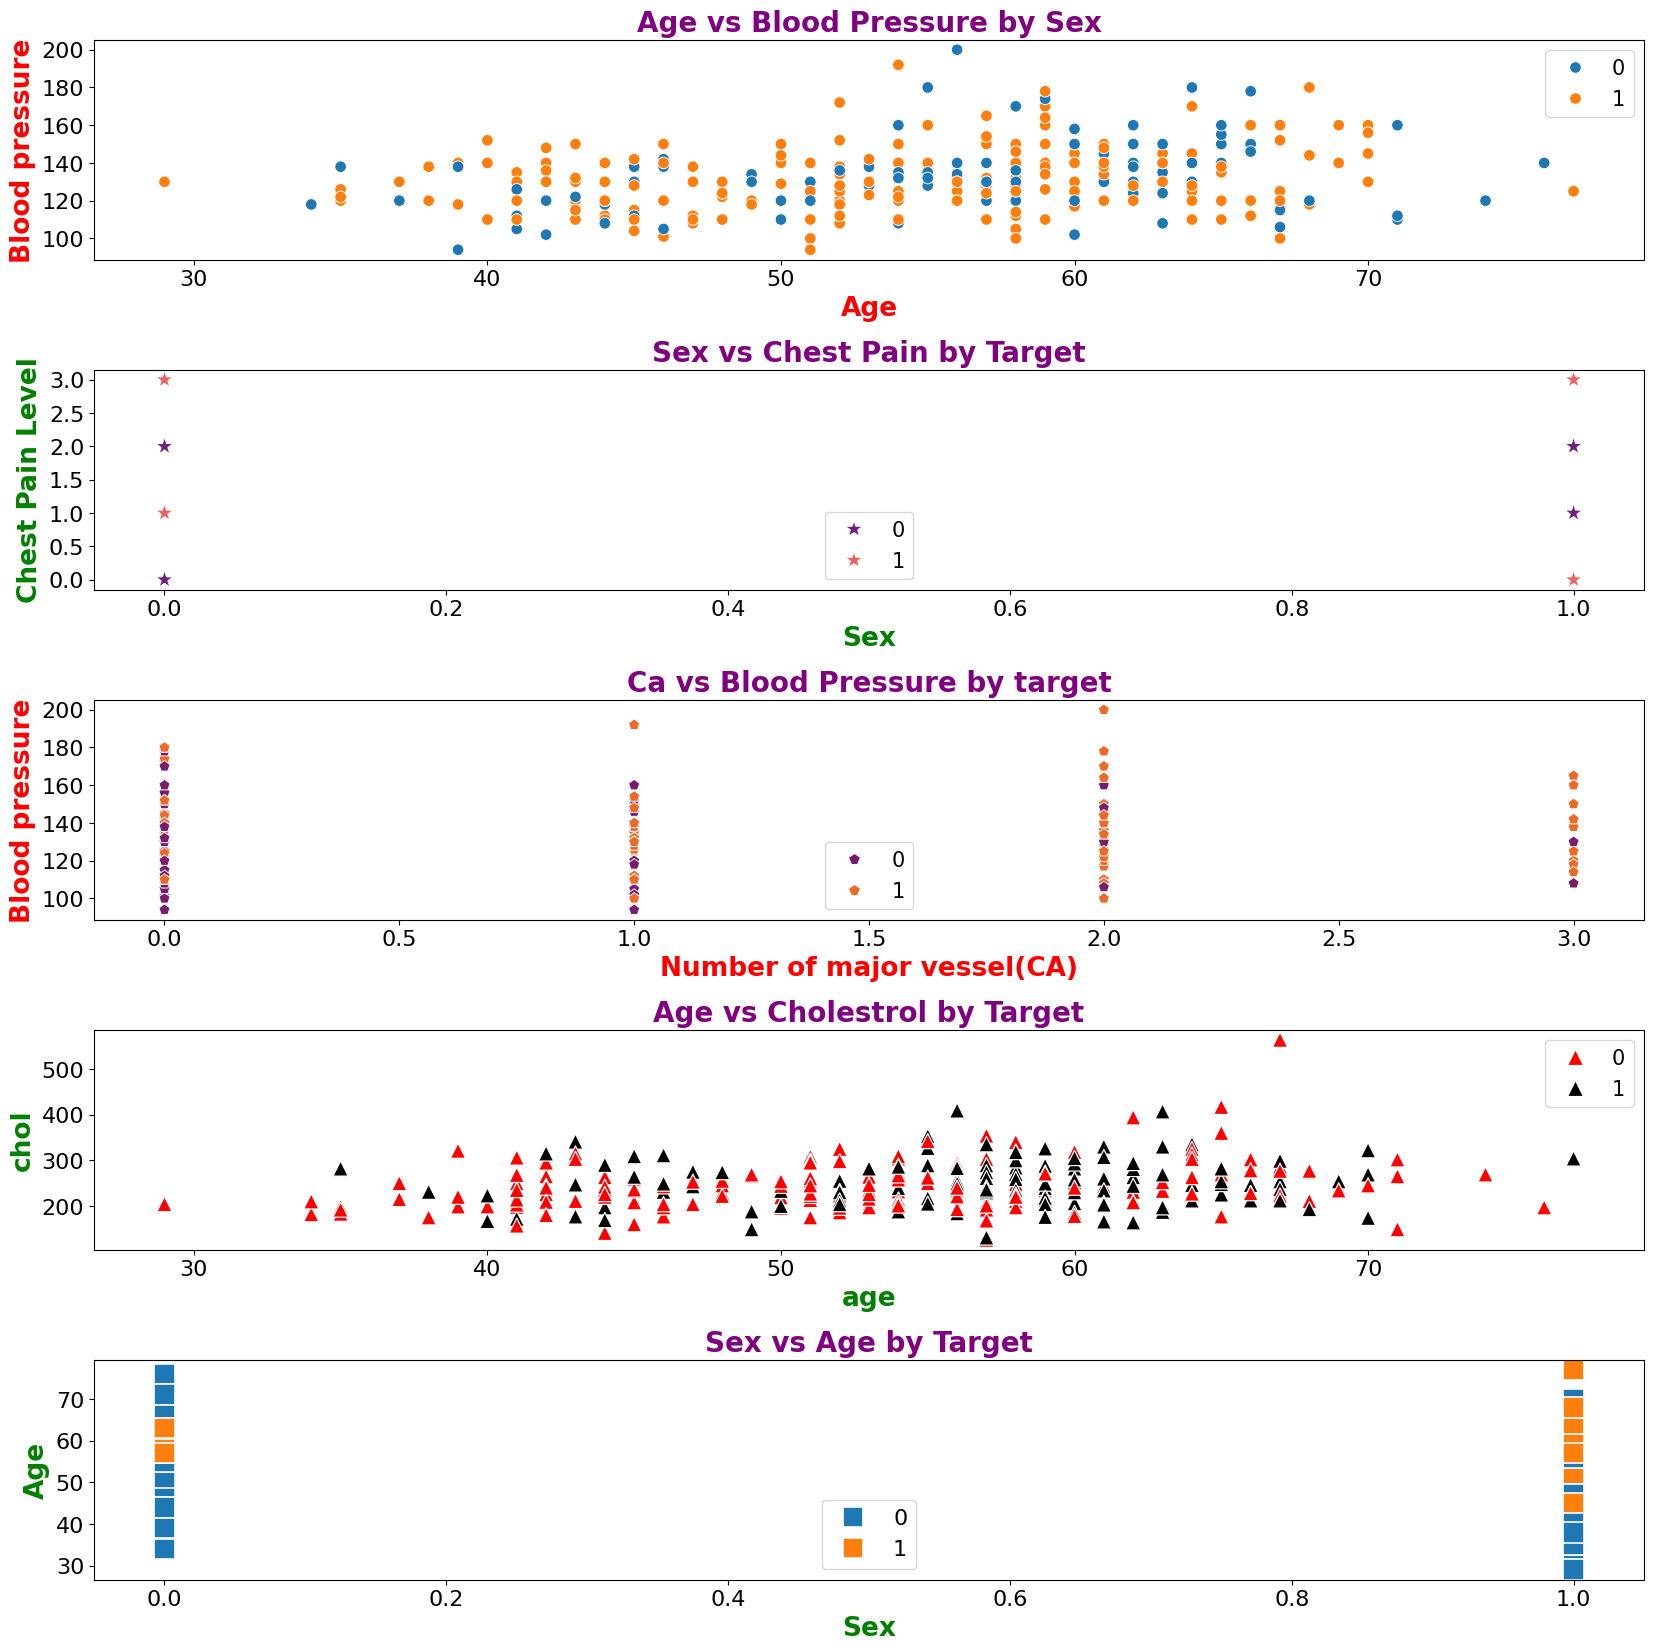

In [1036]:
#For creating a figure with specified size
plt.figure(figsize=(20,20))

# Adjusting the space between subplots
plt.subplots_adjust(hspace=0.5)  # Increase the vertical space between subplots

#Configuration of subplots
plt.subplot(5,1,1)

#plotting scatterplot based on stress level and BMI category
pic1=sns.scatterplot(x='age',y='trestbps',data =refinal,hue='sex',marker="o",s=70)
plt.title('Age vs Blood Pressure by Sex', fontsize=20, fontweight='bold', color='purple')
#Adding Legend
plt.legend(fontsize=15)
#Set the X,y axis labels
plt.xlabel("Age",fontsize=19,fontweight="bold",color="red")
plt.ylabel("Blood pressure",fontsize=19,fontweight="bold",color="red")

#Set the fontsize for the X,Y tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)



#Configuration for second subplots
plt.subplot(5,1,2)

#plotting scatterplot based on Physical Activity level and BMI category
pic2=sns.scatterplot(x='sex',y='cp',data =refinal,hue='target',marker="*",s=220,palette='magma')
plt.title('Sex vs Chest Pain by Target', fontsize=20, fontweight='bold', color='purple')
#Adding Legend
plt.legend(fontsize=15)
#Set the X,y axis labels
plt.xlabel("Sex",fontsize=19,fontweight="bold",color="green")
plt.ylabel("Chest Pain Level",fontsize=19,fontweight="bold",color="green")

#Set the fontsize for the X,Y tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


#Configuration for Third subplots
plt.subplot(5,1,3)

#plotting scatterplot based on Quality of sleep and Occupation
pic3=sns.scatterplot(x='ca',y='trestbps',data =refinal,hue='target',marker="p",s=70,palette='inferno')
plt.title('Ca vs Blood Pressure by target', fontsize=20, fontweight='bold', color='purple')
#Adding Legend
plt.legend(fontsize=15)
#Set the X,y axis labels
plt.xlabel("Number of major vessel(CA)",fontsize=19,fontweight="bold",color="red")
plt.ylabel("Blood pressure",fontsize=19,fontweight="bold",color="red")

#Set the fontsize for the X,Y tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)



#Configuration for fourth subplots
plt.subplot(5,1,4)

custom_palette = {0: 'red', 1: 'black'}
#plotting scatterplot based on stress level and Occupation
pic4=sns.scatterplot(x='age',y='chol',data =refinal,hue='target',marker="^",s=120 ,palette=custom_palette)
plt.title('Age vs Cholestrol by Target', fontsize=20, fontweight='bold', color='purple')
#Adding Legend
plt.legend(fontsize=15)
#Set the X,y axis labels
plt.xlabel("age",fontsize=19,fontweight="bold",color="green")
plt.ylabel("chol",fontsize=19,fontweight="bold",color="green")

#Set the fontsize for the X,Y tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)



#Configuration for fourth subplots
plt.subplot(5,1,5)

#plotting scatterplot based on Physical Activity level and BMI category
pic5=sns.scatterplot(x='sex',y='age',data =refinal,hue='target',marker="s",s=220,color='red')

#Adding Legend
plt.legend(fontsize=15)

#Set the X,y axis labels
plt.xlabel("Sex",fontsize=19,fontweight="bold",color="green")
plt.ylabel("Age",fontsize=19,fontweight="bold",color="green")
plt.title('Sex vs Age by Target', fontsize=20, fontweight='bold', color='purple')
#Set the fontsize for the X,Y tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


#Adding legend
plt.legend(fontsize=16)
print(pic1)
print(pic2)
print(pic3)
print(pic4)
print(pic5)

In [1037]:
# Copy of the original DataFrame
refinal_encoded = cleaned_refinal1.copy()

# Implementing one-hot encoding on the specified categorical features
refinal_encoded = pd.get_dummies(refinal_encoded, columns=['cp', 'restecg', 'thal'])

# Convert the rest of the categorical variables that don't need one-hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    refinal_encoded[feature] = refinal_encoded[feature].astype(int)

# Step 3: Convert all boolean (one-hot) columns to integers
bool_colu = refinal_encoded.select_dtypes(include='bool').columns
refinal_encoded[bool_colu] = refinal_encoded[bool_colu].astype(int)


refinal_encoded.dtypes



,0
age,int64
sex,int64
trestbps,int64
chol,int64
fbs,int64
thalach,int64
exang,int64
oldpeak,float64
slope,int64
ca,int64


In [1038]:
refinal_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,2,0,...,1,0,0,0,0,0,1,0,1,0
1,67,1,160,286,0,108,1,1.5,1,3,...,0,0,0,1,0,0,1,1,0,0
2,67,1,120,229,0,129,1,2.6,1,2,...,0,0,0,1,0,0,1,0,0,1
3,37,1,130,250,0,187,0,3.5,2,0,...,0,0,1,0,1,0,0,1,0,0
4,41,0,130,204,0,172,0,1.4,0,0,...,0,1,0,0,0,0,1,1,0,0



Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.79      0.76      0.78        25

    accuracy                           0.81        57
   macro avg       0.80      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57


Random forest Accuracy Score: 80.70%


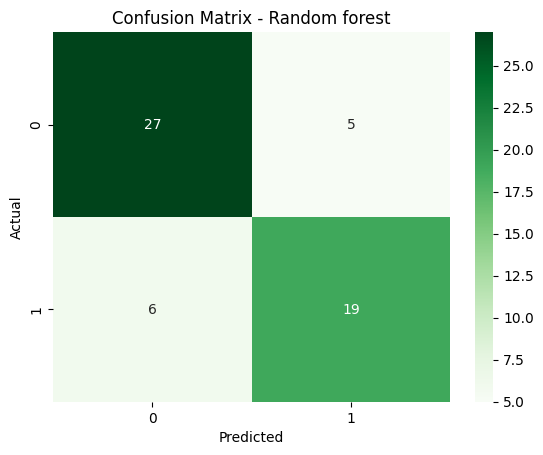

In [1039]:
# copy of cleaned data
refinenco = cleaned_refinal1.copy()

#One-hot encode categorical features that have various categories
refinenco = pd.get_dummies(refinenco, columns=['cp', 'restecg', 'thal'],drop_first=True)

# Converting remaining categorical features to integers
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    refinenco[feature] =refinenco[feature].astype(int)

# Defining X and y
X = refinenco.drop('target', axis=1)
y = refinenco['target']

#split Test/train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100,max_depth=9,min_samples_split=4,class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

#Make predictions on the test set
ran_pred = rf_model.predict(X_test)

#Evaluateing the model
print("\nClassification Report:\n", classification_report(y_test, ran_pred))
print("\nRandom forest Accuracy Score: {:.2f}%".format(accuracy_score(y_test, ran_pred) * 100))

conf_mat = confusion_matrix(y_test, ran_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix - Random forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.83      0.76      0.79        25

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57

SVM Accuracy Score: 82.46%


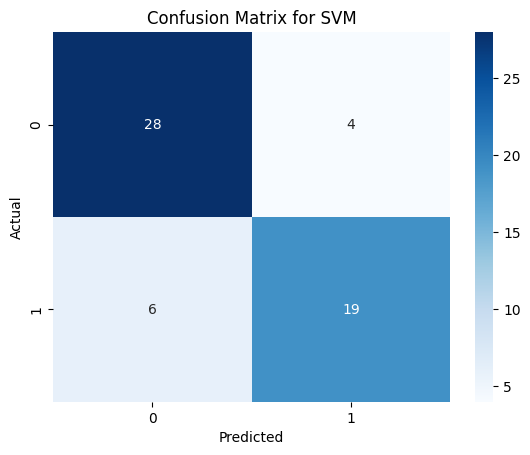

In [1040]:
#Copy cleaned dataset
refinenco = cleaned_refinal1.copy()

# One-hot encode categorical features with multiple categories
refinenco = pd.get_dummies(refinenco, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert binary categorical features to integers
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    refinenco[feature] = refinenco[feature].astype(int)

# Defining X (features) and y is (target)
X = refinenco.drop('target', axis=1)
y = refinenco['target']

# spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train svm model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale',probability=True,class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test_scaled)

# Evaluate model
print("\nClassification Report:\n", classification_report(y_test, svm_pred))
print("SVM Accuracy Score: {:.2f}%".format(accuracy_score(y_test, svm_pred) * 100))

# Confusion Matrix
confu_mat = confusion_matrix(y_test, svm_pred)
sns.heatmap(confu_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.88      0.84      0.86        25

    accuracy                           0.88        57
   macro avg       0.88      0.87      0.87        57
weighted avg       0.88      0.88      0.88        57

Logistic Regression Accuracy Score: 87.72%


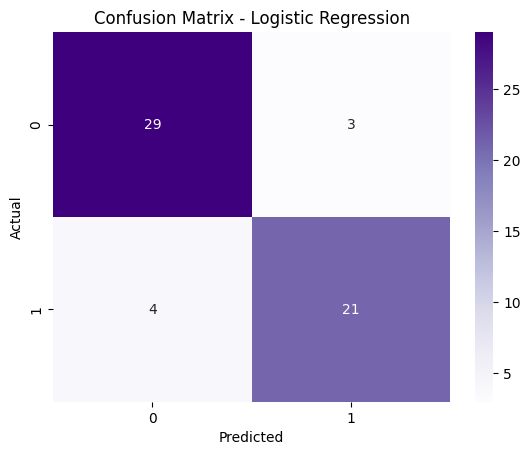

In [1041]:
# Copy of cleaned and encoded dataset
refinenco = refinal_encoded.copy()

# Define features and target
X = refinenco.drop('target', axis=1)
y = refinenco['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and training Logistic Regression model
logreg_model = LogisticRegression(max_iter=100, random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions
log_pred = logreg_model.predict(X_test_scaled)

# Evaluate model
print("\nClassification Report:\n", classification_report(y_test, log_pred))
print("Logistic Regression Accuracy Score: {:.2f}%".format(accuracy_score(y_test, log_pred) * 100))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, log_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.79      0.76      0.78        25

    accuracy                           0.81        57
   macro avg       0.80      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57

Accuracy: 80.70%


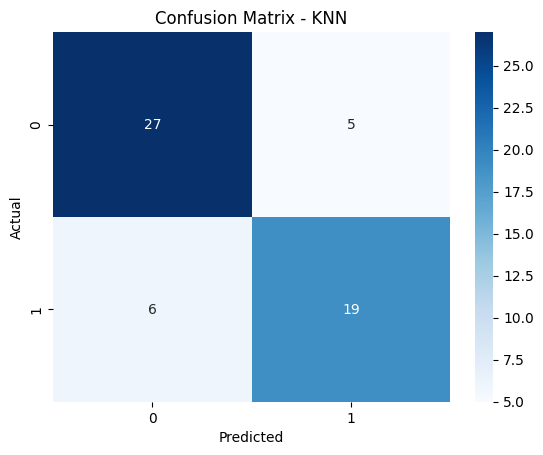

In [1042]:
# 'refinenco' is the preprocessed DataFrame with one-hot encoding done
X = refinenco.drop('target', axis=1)
y = refinenco['target']

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and training KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict on test set
knn_pred = knn.predict(X_test_scaled)

# Print evaluation metrics
print(classification_report(y_test, knn_pred))
print(f"Accuracy: {accuracy_score(y_test, knn_pred)*100:.2f}%")

# Ploting confusion matrix
conf_mat = confusion_matrix(y_test, knn_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()


In [1043]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from tabulate import tabulate

# Creating a dictionary to store model results
model_results = {
    "Model": [],
    "Precision (Class 0)": [],
    "Precision (Class 1)": [],
    "Recall (Class 0)": [],
    "Recall (Class 1)": [],
    "F1-Score (Class 0)": [],
    "F1-Score (Class 1)": [],
    "Macro Avg Precision": [],
    "Macro Avg Recall": [],
    "Macro Avg F1-Score": [],
    "Accuracy": [],
}

# Function to extract and store metrics
def store_metrics(model_name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = accuracy_score(y_true, y_pred)

    model_results["Model"].append(model_name)
    model_results["Precision (Class 0)"].append(report['0']['precision'])
    model_results["Precision (Class 1)"].append(report['1']['precision'])

    model_results["Recall (Class 0)"].append(report['0']['recall'])
    model_results["Recall (Class 1)"].append(report['1']['recall'])

    model_results["F1-Score (Class 0)"].append(report['0']['f1-score'])
    model_results["F1-Score (Class 1)"].append(report['1']['f1-score'])

    model_results["Macro Avg Precision"].append(report['macro avg']['precision'])
    model_results["Macro Avg Recall"].append(report['macro avg']['recall'])
    model_results["Macro Avg F1-Score"].append(report['macro avg']['f1-score'])
    model_results["Accuracy"].append(accuracy)

# Store results from Logistic Regression
store_metrics("Logistic Regression", y_test, log_pred)

# Store results from Support Vector Machine
store_metrics("SVM", y_test, svm_pred)

# Store results from K-Nearest Neighbor
store_metrics("KNN", y_test, knn_pred)

#Store results from Random Forest
store_metrics("Random Forest", y_test, ran_pred)

# Convert results to DataFrame
results_final = pd.DataFrame(model_results)

#To display the results in a table
print(tabulate(results_final, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════════════╤═══════════════════════╤═══════════════════════╤════════════════════╤════════════════════╤══════════════════════╤══════════════════════╤═══════════════════════╤════════════════════╤══════════════════════╤════════════╕
│ Model               │   Precision (Class 0) │   Precision (Class 1) │   Recall (Class 0) │   Recall (Class 1) │   F1-Score (Class 0) │   F1-Score (Class 1) │   Macro Avg Precision │   Macro Avg Recall │   Macro Avg F1-Score │   Accuracy │
╞═════════════════════╪═══════════════════════╪═══════════════════════╪════════════════════╪════════════════════╪══════════════════════╪══════════════════════╪═══════════════════════╪════════════════════╪══════════════════════╪════════════╡
│ Logistic Regression │              0.878788 │              0.875    │            0.90625 │               0.84 │             0.892308 │             0.857143 │              0.876894 │           0.873125 │             0.874725 │   0.877193 │
├─────────────────────┼─────────────

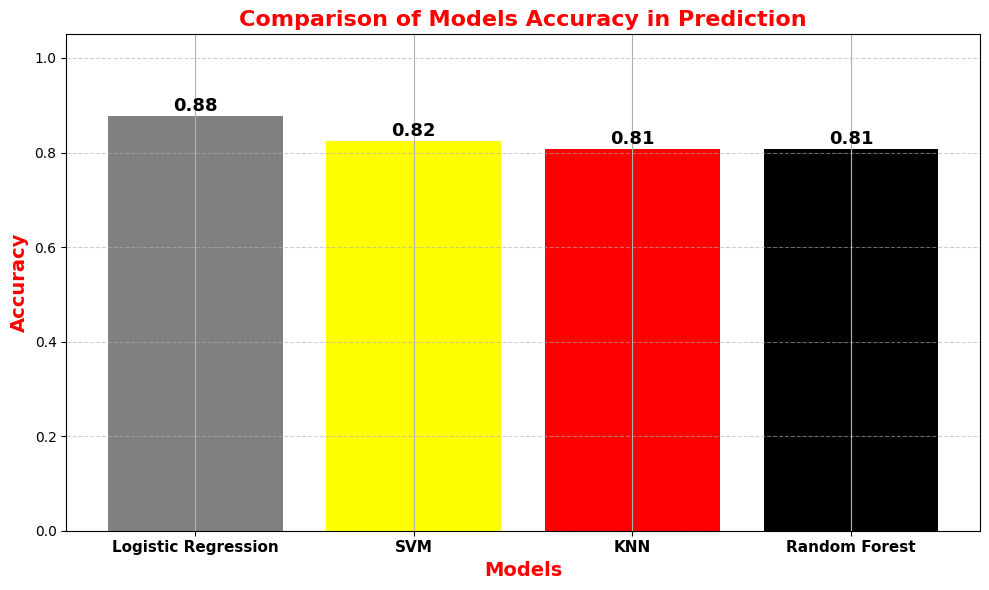

In [1045]:

plt.figure(figsize=(10, 6))
custom_colors=["grey","yellow","red","black"]
bars = plt.bar(results_final['Model'], results_final['Accuracy'],color=custom_colors)

# For displaying values above to the bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', fontsize=13,fontweight="bold")

# Set title and labels
plt.title("Comparison of Models Accuracy in Prediction",color="red",fontsize=16,fontweight="bold")
plt.ylabel("Accuracy",fontsize=14, fontweight='bold',color="red",)
plt.xlabel("Models",fontsize=14, fontweight='bold',color="red",)
plt.ylim(0, 1.05)
plt.grid(True)\
# Customizing X-axis labels (model names)
plt.xticks (fontsize=11, fontweight='bold')

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()